### Visulising initial state fidelity distance on the Bloch sphere

In [5]:
from qutip import *
import numpy as np
import scipy.linalg as sl

import h5py
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl

import pandas as pd
import seaborn as sns

In [6]:
def read_initial_states_for_gamma(hdf5_file, gamma_value):
    """
    This function reads the initial states and corresponding times for a specific gamma value 
    from the HDF5 file.

    Parameters:
    hdf5_file (str): Path to the HDF5 file.
    gamma_value (str): The gamma value for which the data is extracted.

    Returns:
    dict: A dictionary where keys are state names and values are tuples of initial density matrices and initial times.
    """
    initial_states = {}

    with h5py.File(hdf5_file, 'r') as f:
        if gamma_value in f:
            gamma_group = f[gamma_value]

            for state in gamma_group.keys():
                state_group = gamma_group[state]
                
                # Read initial state (rho_init) and initial time (time_init)
                rho_init = np.array(state_group['rho_init'])
                time_init = np.array(state_group['time_init'])

                # Store in the dictionary
                initial_states[state] = (rho_init, time_init)
        else:
            print(f"Gamma value {gamma_value} not found in the HDF5 file.")

    return initial_states


In [7]:
# Example usage:
gamma_value = "0.079477"
hdf5_file = "SB_simulation_init_states.h5"
init_states = read_initial_states_for_gamma(hdf5_file, gamma_value)

# Print the initial states
for state, (rho_init, time_init) in init_states.items():
    print(f"State: {state}")
    print(f"Initial Density Matrix (rho_init):\n{rho_init}")
    print(f"Initial Time (time_init): {time_init}\n")

State: D1
Initial Density Matrix (rho_init):
[[0.78841898+0.j         0.30594623+0.26985997j]
 [0.30594623-0.26985997j 0.21158102+0.j        ]]
Initial Time (time_init): (0.06+0j)

State: D10
Initial Density Matrix (rho_init):
[[0.03609789+0.j         0.01143001+0.17765485j]
 [0.01143001-0.17765485j 0.96390211+0.j        ]]
Initial Time (time_init): (0.06+0j)

State: D2
Initial Density Matrix (rho_init):
[[ 0.78841898+0.j         -0.26895794+0.30504322j]
 [-0.26895794-0.30504322j  0.21158102+0.j        ]]
Initial Time (time_init): (0.06+0j)

State: D3
Initial Density Matrix (rho_init):
[[0.2136968 +0.j         0.30594623+0.26985996j]
 [0.30594623-0.26985996j 0.7863032 +0.j        ]]
Initial Time (time_init): (0.06+0j)

State: D4
Initial Density Matrix (rho_init):
[[ 0.2136968 +0.j         -0.26895793+0.30504322j]
 [-0.26895793-0.30504322j  0.7863032 +0.j        ]]
Initial Time (time_init): (0.06+0j)

State: D5
Initial Density Matrix (rho_init):
[[0.67865681+0.j         0.46510724-0.028

In [14]:
init_rhos = []
for state, (rho_init, time_init) in init_states.items():
    init_rhos.append(rho_init)


In [16]:
pole = [0,90]
ecuator = [0,0]

In [22]:
def bloch_vector(rho):
    rho = np.matrix(rho)
    # Pauli matrices
    sigmas = [ [[0, 1], [1, 0]], [[0, -1j], [ 1j, 0]], [[1, 0],[0, -1]]] 
    # Bloch vector of the 2 x 2 density matrix
    bloch_vector = np.array([ np.real(np.trace(np.array(sigma) @ rho)) for sigma in sigmas])
    return bloch_vector

def bloch_init_states(rho, view = [-60,30], palette = 'plasma'):
   
    b = qutip.Bloch()
    b.view = view
    b.point_marker = ['.']
    b.point_size = [300]
    
    for i in range(10):
        xp, yp, zp = bloch_vector(rho[i]).tolist()
        b.add_points([xp, yp, zp])
    
    b.render()
    
    return b

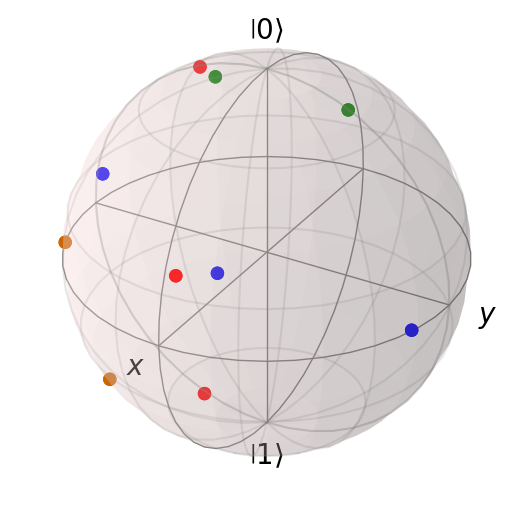

In [23]:
f1  = bloch_init_states(init_rhos)
f1.show()
bb1 = f1.fig
bb1.set_figwidth(5)
bb1.set_figheight(5)
bb1.savefig('Bloch3d_w_dodecahedron.pdf')

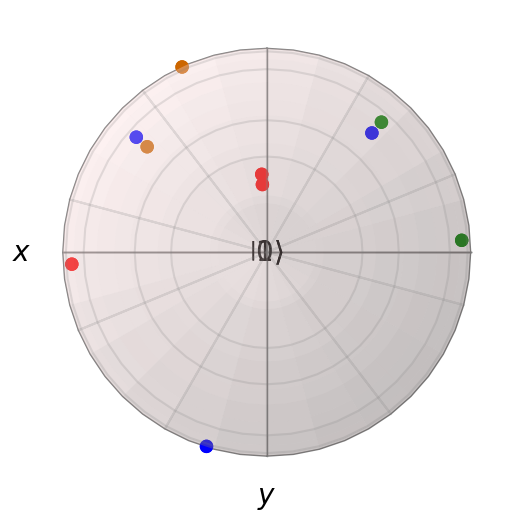

In [25]:
f2  = bloch_init_states(init_rhos, view = pole)
f2.show()
bb2 = f2.fig
#bb2.savefig('Bloch_pole.svg')

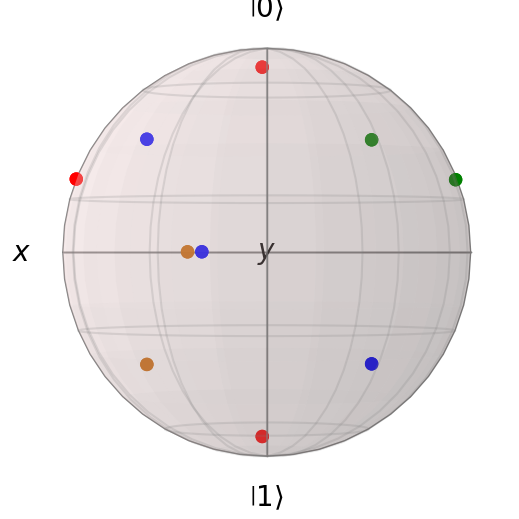

In [26]:
f3  = bloch_init_states(init_rhos, view = ecuator)
f3.show()
bb3 = f3.fig
#bb3.savefig('bloch_ecuatorY.svg')

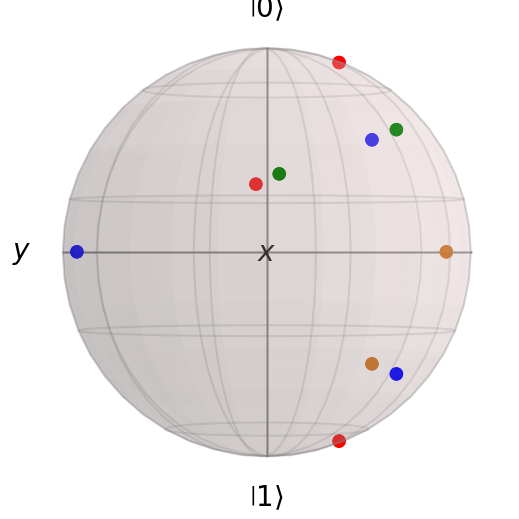

In [27]:
xecuator = [90,0]
f4  = bloch_init_states(init_rhos, view = xecuator)
f4.show()
bb4 = f4.fig
#bb4.savefig('bloch_ecuatorX.svg')